In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
data=pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


**EDA**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.shape

(400, 11)

In [6]:
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

**Data Visualization**

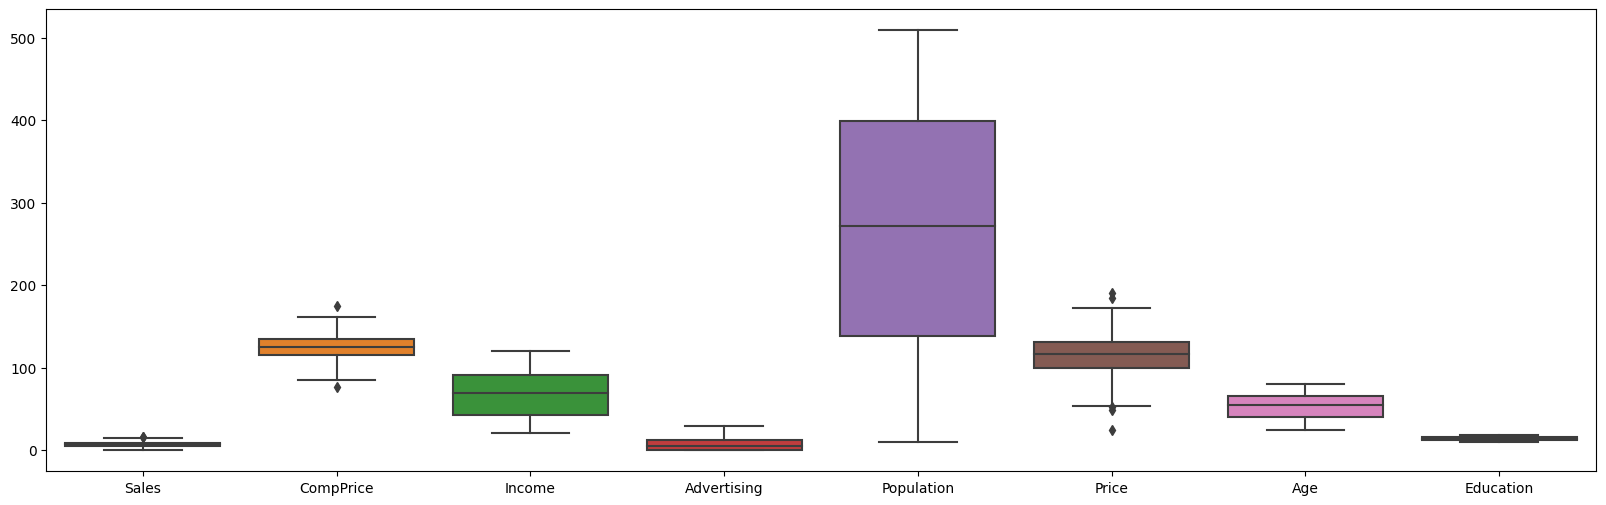

In [7]:
plt.figure(figsize=(20,6))
sns.boxplot(data)

plt.show()

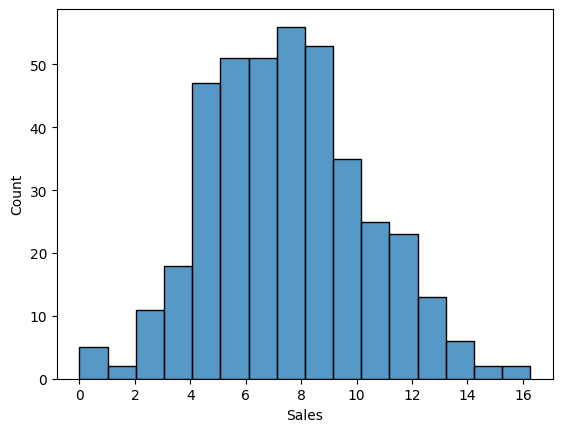

In [8]:
sns.histplot(data['Sales'])
plt.show()

<ipython-input-9-344da4d478d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)


<Axes: >

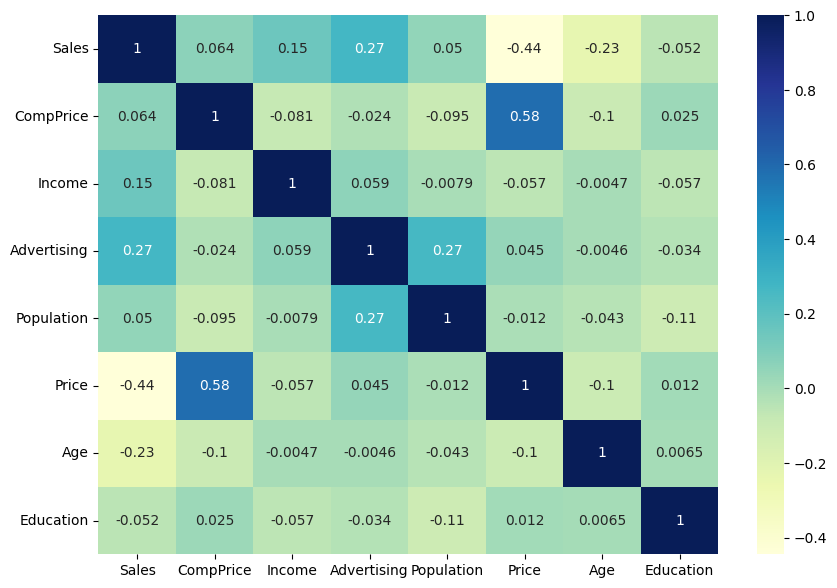

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

**Data Preprocessing**

In [10]:
data=pd.get_dummies(data,columns=['Urban','US'], drop_first=True)

In [11]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [12]:
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [13]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [14]:
x=data.drop('ShelveLoc', axis=1)
y=data['ShelveLoc']

In [15]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [16]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [17]:
data['ShelveLoc'].unique()

array([3, 1, 2])

In [18]:
data.ShelveLoc.value_counts()


2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [19]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

**Building Decision Tree Classifier using Entropy Criteria**

In [21]:
from sklearn.tree import DecisionTreeClassifier

entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

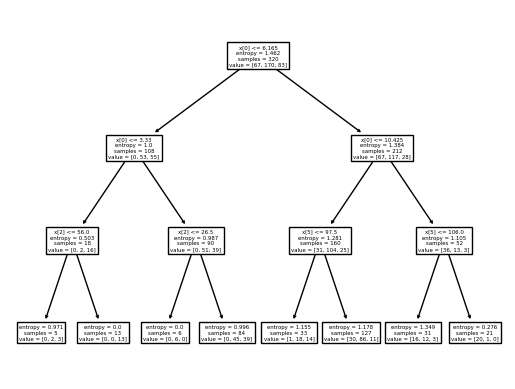

In [22]:
from sklearn import tree

tree.plot_tree(entropy);

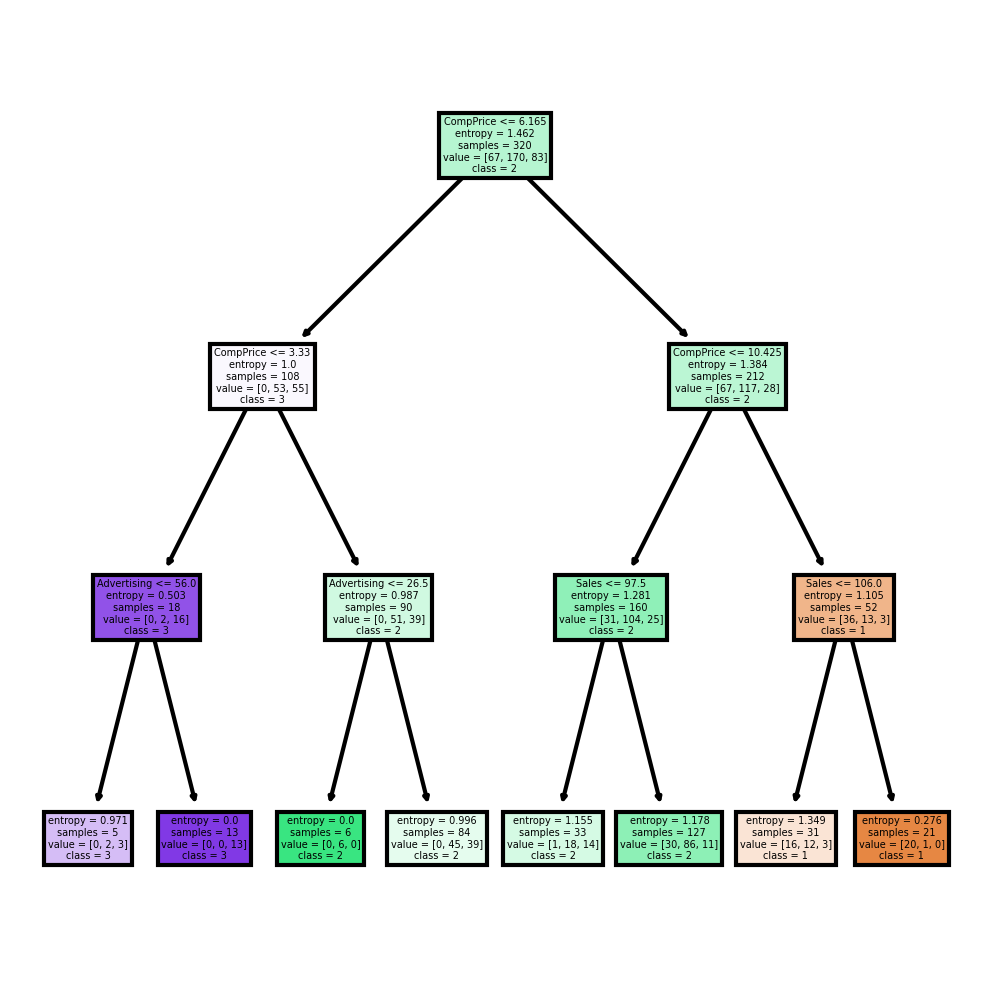

In [23]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price','Sales', 'Age', 'Education', 'Urban', 'US']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(entropy,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [24]:
entropy.score(x_train, y_train)

0.646875

In [25]:
preds = entropy.predict(x_test)
pd.Series(preds).value_counts()

2    63
1    13
3     4
dtype: int64

In [26]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2])

In [27]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, preds)
cm

array([[ 8, 10,  0],
       [ 5, 41,  3],
       [ 0, 12,  1]])

<Axes: >

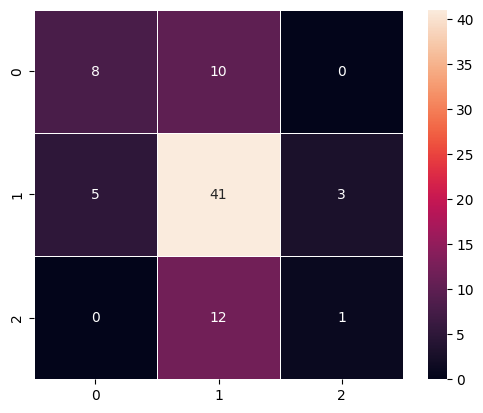

In [28]:
sns.heatmap(data=cm, linewidth=0.5, annot=True, square=True)

In [29]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test, preds)
print('Accuracy Score is', acc*100, '%')

Accuracy Score is 62.5 %


In [30]:
from sklearn.metrics import classification_report

print('Classification Report- \n', classification_report(y_test, preds))

Classification Report- 
               precision    recall  f1-score   support

           1       0.62      0.44      0.52        18
           2       0.65      0.84      0.73        49
           3       0.25      0.08      0.12        13

    accuracy                           0.62        80
   macro avg       0.51      0.45      0.46        80
weighted avg       0.58      0.62      0.58        80



**Building Decision Tree using Gini**

In [31]:
gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [32]:
gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

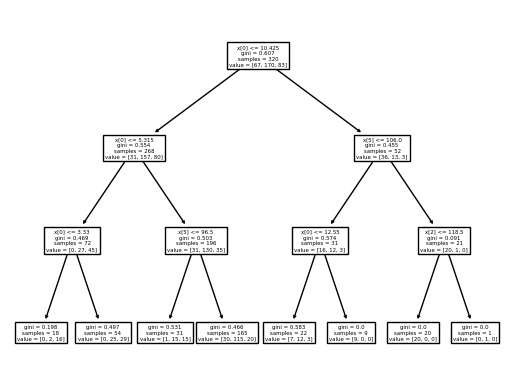

In [33]:
tree.plot_tree(gini);

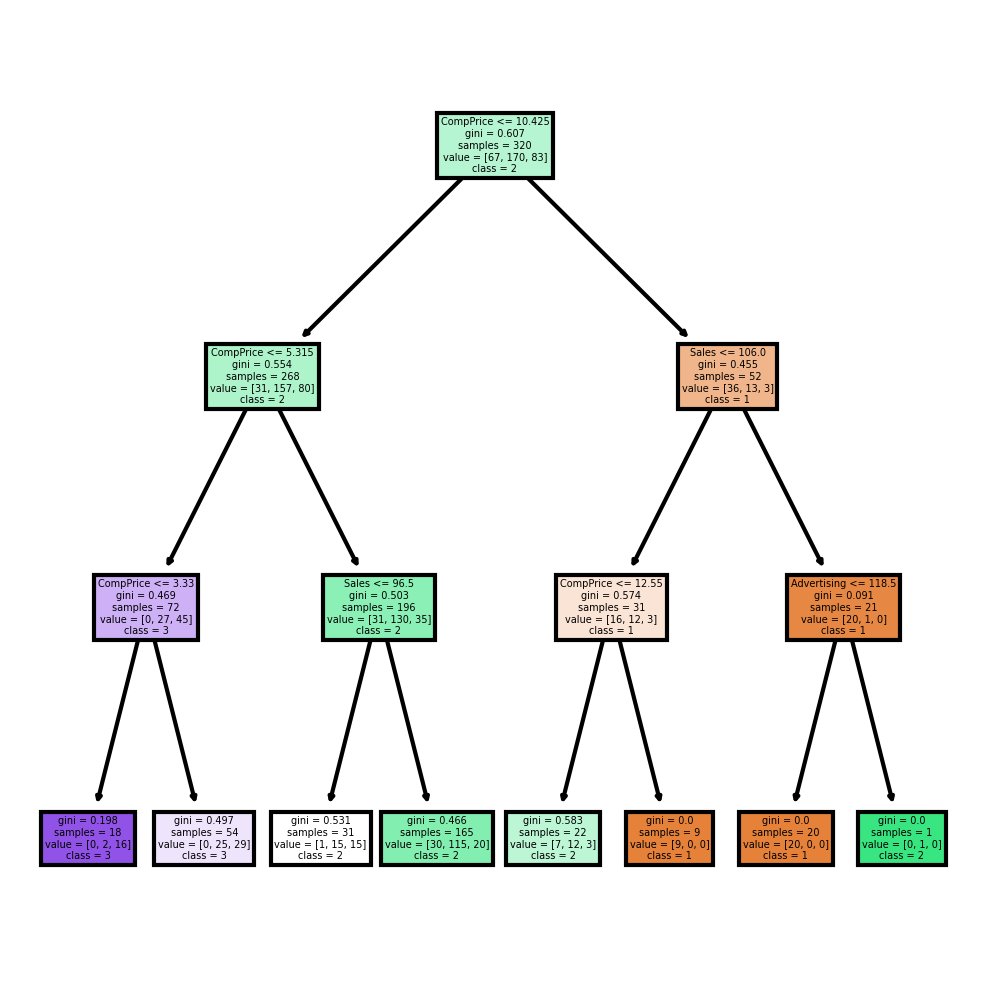

In [34]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Sales', 'Age', 'Education', 'Urban', 'US']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(gini,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [35]:
gini.score(x_train, y_train)

0.678125

In [36]:
preds = gini.predict(x_test)
pd.Series(preds).value_counts()

2    53
3    22
1     5
dtype: int64

In [37]:
preds

array([2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 1, 3, 2, 2, 3, 3, 2, 2,
       2, 2, 3, 3, 2, 3, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 2, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2])

In [38]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, preds)
cm

array([[ 4, 12,  2],
       [ 1, 34, 14],
       [ 0,  7,  6]])

<Axes: >

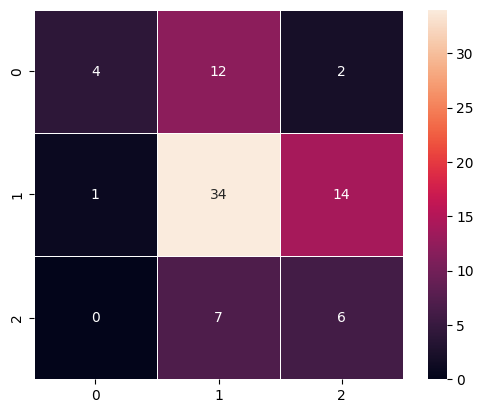

In [39]:
sns.heatmap(data=cm, linewidth=0.5, annot=True, square=True)

In [40]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test, preds)
print('Accuracy Score is', acc*100, '%')

Accuracy Score is 55.00000000000001 %


In [41]:
from sklearn.metrics import classification_report

print('Classification Report- \n', classification_report(y_test, preds))

Classification Report- 
               precision    recall  f1-score   support

           1       0.80      0.22      0.35        18
           2       0.64      0.69      0.67        49
           3       0.27      0.46      0.34        13

    accuracy                           0.55        80
   macro avg       0.57      0.46      0.45        80
weighted avg       0.62      0.55      0.54        80



**Decision Tree Regression**

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [45]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
model.score(X_test,y_test)

-1.3192487545462885